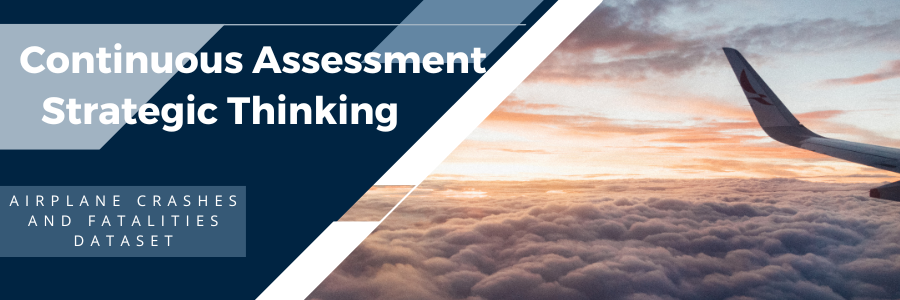

# **1.  Importing libraries and dataset**

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Dataset
df = pd.read_csv('Airplane_Crashes_and_Fatalities.csv')

# **2. Exploratory Data Analysis**

In [3]:
#Calculating dimensions of dataframe
df.shape

(5268, 14)

In [4]:
df.dtypes

index             int64
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3562 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [6]:
#Displaying frist 15 rows of the dataset
df.head(15)

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


# **2.1 Data Cleaning**

In [7]:
#Displaying how many missing values we have in every feature
df.isna().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [8]:
#Displaying how many missing values we have in total
df.isna().sum().sum()

10198

In [9]:
#Displaying Percentage of missing Data
missing_data = df.isna().sum()/100
missing_values = pd.DataFrame({'column_name': df.columns})

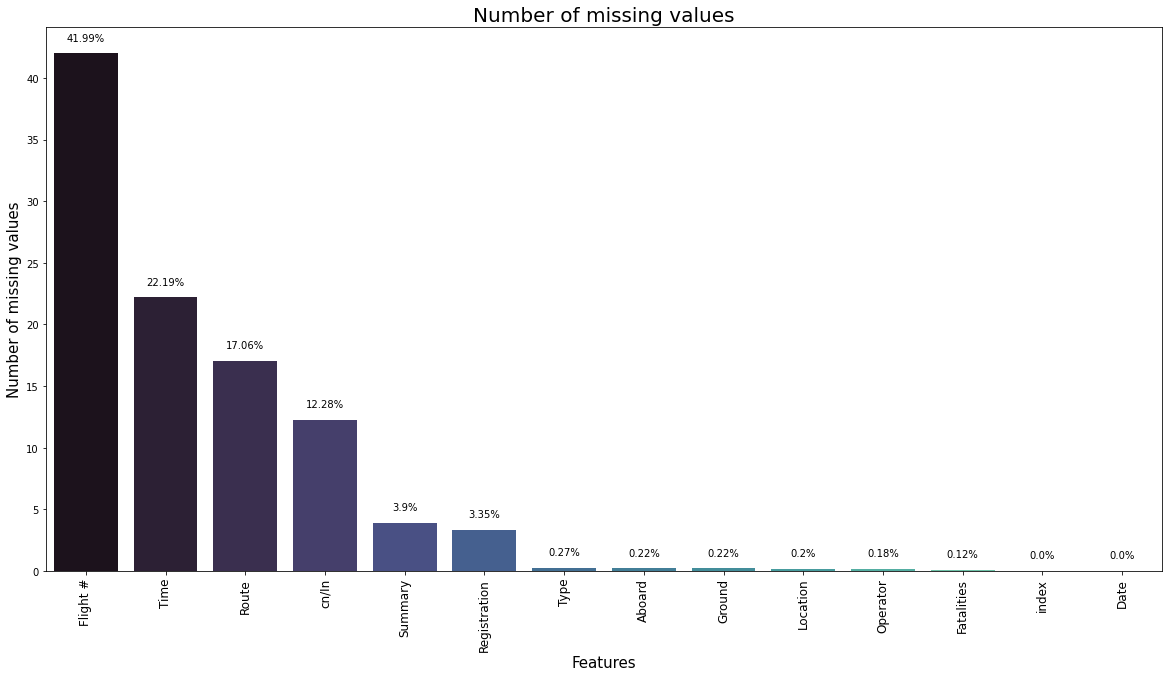

In [10]:
#Plotting missing data in descending order
plt.figure(figsize=(20, 10))
missing_data_sorted = missing_data.sort_values(ascending=False)
for index, value in enumerate(missing_data_sorted):
    plt.text(index, value+1, str(value) + "%", ha='center', fontsize=10)
sns.barplot(x=missing_data_sorted.index, y=missing_data_sorted, palette='mako')
plt.title('Number of missing values', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Number of missing values', fontsize=15)
plt.show()

In [11]:
#Dropping unnecesary features
df.drop(['index', 'Flight #', 'Registration', 'cn/In'], axis=1, inplace=True)

In [12]:
#Checking number of missing values
df.isna().sum()

Date             0
Time          2219
Location        20
Operator        18
Route         1706
Type            27
Aboard          22
Fatalities      12
Ground          22
Summary        390
dtype: int64

In [13]:
#Filling missing values in "Route" feature 
df['Route'].fillna('Unknown', inplace=True)
#Checking number of value
df.isna().sum()

Date             0
Time          2219
Location        20
Operator        18
Route            0
Type            27
Aboard          22
Fatalities      12
Ground          22
Summary        390
dtype: int64

In [14]:
#Calculating total sum of missing values after dropping some features
df.isna().sum().sum()

2730

In [15]:
#Dropping missinga values
df.dropna(inplace = True)

In [16]:
df.head()

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,Unknown,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...


In [17]:
df.shape

(3023, 10)

# **2.2 Feature Engineering**

In [18]:
#Splitting Date feature in different features (day, month and year)
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1908-09-17
1      1912-07-12
3      1913-09-09
4      1913-10-17
5      1915-03-05
          ...    
5261   2009-04-29
5262   2009-05-03
5263   2009-05-20
5265   2009-06-01
5266   2009-06-07
Name: Date, Length: 3023, dtype: datetime64[ns]

In [19]:
#Creating new feature 'Year of the crash'
df['Date'].dt.year

0       1908
1       1912
3       1913
4       1913
5       1915
        ... 
5261    2009
5262    2009
5263    2009
5265    2009
5266    2009
Name: Date, Length: 3023, dtype: int64

In [20]:
#Creating new feature 'Month of the crash'
df['Date'].dt.month

0        9
1        7
3        9
4       10
5        3
        ..
5261     4
5262     5
5263     5
5265     6
5266     6
Name: Date, Length: 3023, dtype: int64

In [21]:
#Creating new feature 'Day of the crash'
df['Date'].dt.day

0       17
1       12
3        9
4       17
5        5
        ..
5261    29
5262     3
5263    20
5265     1
5266     7
Name: Date, Length: 3023, dtype: int64

In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head(1)

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Year,Month,Day
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17


In [23]:
#Dropping 'Date' feature of dataset
df.drop(['Date'], axis=1, inplace=True)
df.head()

,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Year,Month,Day
0,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17
1,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12
3,18:30,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9,9
4,10:30,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,17
5,01:00,"Tienen, Belgium",Military - German Navy,Unknown,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...,1915,3,5


In [24]:
df['Survivors'] = df['Aboard'] - df['Fatalities']
df.head(2)

,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Year,Month,Day,Survivors
0,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,1.0
1,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,0.0


In [25]:
df["Total Death"] = df["Fatalities"] + df["Ground"]
df.head(2)

,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Year,Month,Day,Survivors,Total Death
0,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,1.0,1.0
1,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12,0.0,5.0


In [26]:
#Reorganizing order of  features, 'Hour_Crash', 'Min_Crash',
df = df[['Day', 'Month', 'Year',  'Location', 'Operator', 'Route', 'Type', 'Aboard', 'Fatalities','Survivors','Ground','Total Death', 'Summary']]
df.head()

,Day,Month,Year,Location,Operator,Route,Type,Aboard,Fatalities,Survivors,Ground,Total Death,Summary
0,17,9,1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,0.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,12,7,1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...
3,9,9,1913,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,14.0,6.0,0.0,14.0,The airship flew into a thunderstorm and encou...
4,17,10,1913,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),30.0,30.0,0.0,0.0,30.0,Hydrogen gas which was being vented was sucked...
5,5,3,1915,"Tienen, Belgium",Military - German Navy,Unknown,Zeppelin L-8 (airship),41.0,21.0,20.0,0.0,21.0,Crashed into trees while attempting to land af...


In [27]:
df.shape

(3023, 13)

# **2.3 Data Visualization**

In [28]:
location_mode = df["Location"].mode()
print(location_mode)

0    Anchorage, Alaska
Name: Location, dtype: object


In [29]:
# Displaying the most catastrophic airplane incident of all time
Fatal_Crash=df[df['Fatalities']==df['Fatalities'].max()]
Fatal_Crash

,Day,Month,Year,Location,Operator,Route,Type,Aboard,Fatalities,Survivors,Ground,Total Death,Summary
2963,27,3,1977,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,583.0,61.0,0.0,583.0,Both aircraft were diverted to Tenerife becaus...


In [30]:
#Displaying the most fatal crash Summary.
list(Fatal_Crash["Summary"])

['Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The Pan Am aircraft was named Clipper Victor. The KLM aircraft was named Rhine River.']

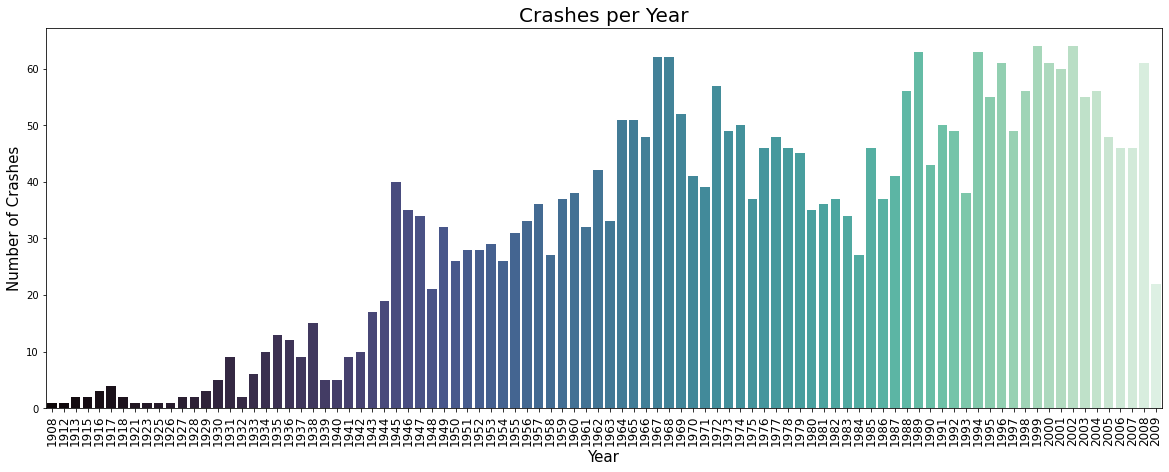

In [31]:
#Displaying number of crashes per year
plt.figure(figsize=(20, 7))
sns.barplot(x =df['Year'].value_counts().index, y =df['Year'].value_counts(), palette='mako')
plt.title('Crashes per Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Number of Crashes', fontsize=15)
plt.show()

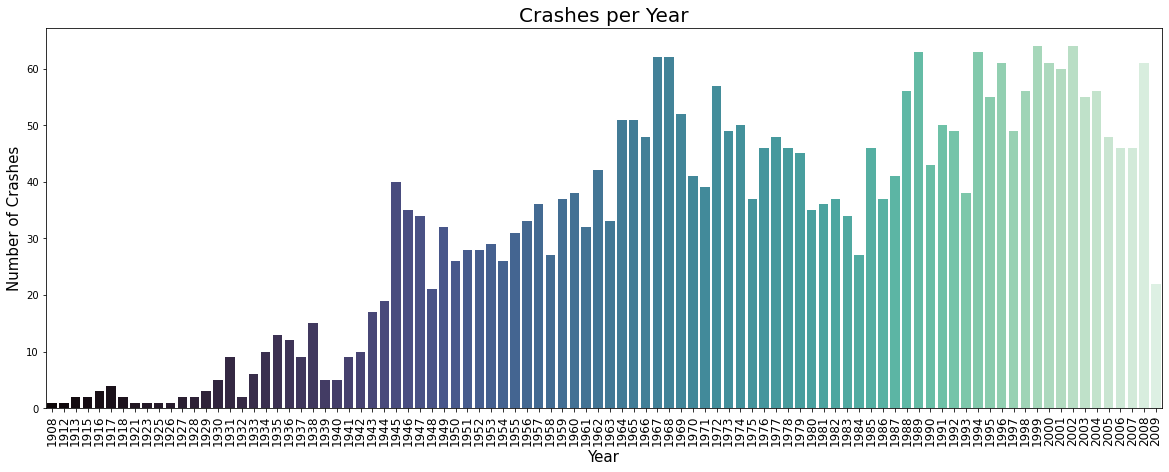

In [32]:
plt.figure(figsize=(20, 7))

# Sort the value_counts() Series in ascending order by its index
counts_sorted = df['Year'].value_counts().sort_index()

sns.barplot(x=counts_sorted.index, y=counts_sorted, palette='mako')

plt.title('Crashes per Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Number of Crashes', fontsize=15)

plt.show()


Text(0, 0.5, 'Number of Crashes')

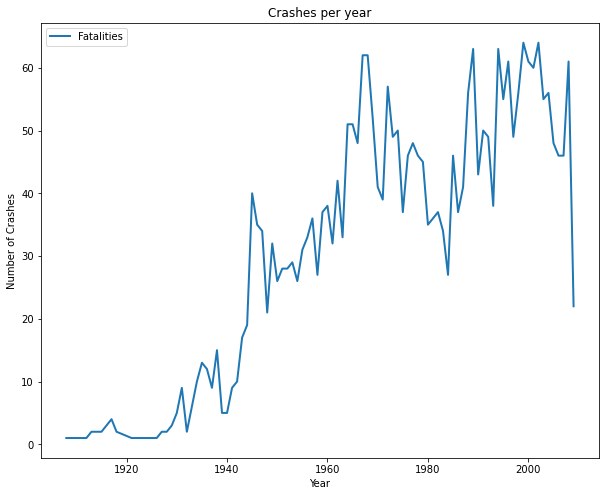

In [33]:
crash_year = df.loc[:, ["Year","Fatalities"]].groupby(['Year']).count()
crash_year_plt = crash_year.plot(lw=2, title='Crashes per year', figsize=(10,8))
crash_year_plt.set_xlabel("Year")
crash_year_plt.set_ylabel("Number of Crashes")

Text(0, 0.5, 'Numbers of People Aboard')

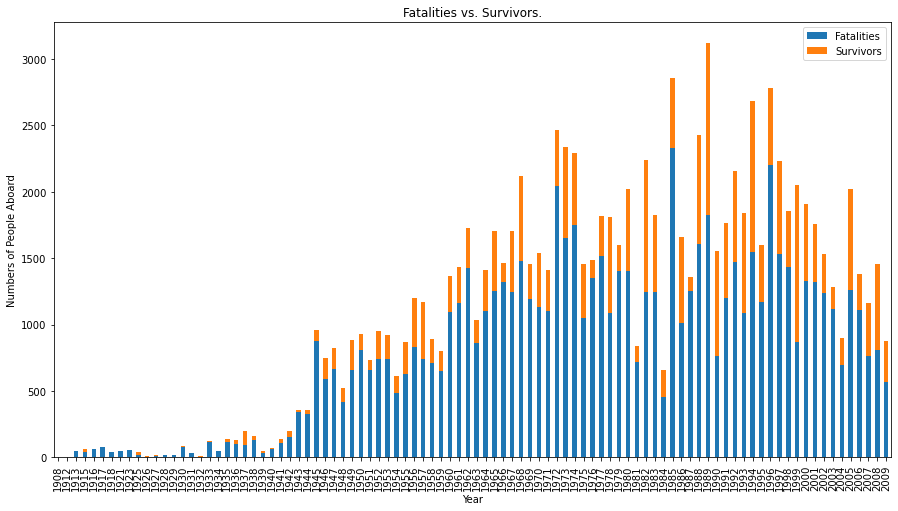

In [34]:
#Comparing Fatalities vs. Survivors
year_stats = df.loc[:, ["Year","Fatalities", "Survivors"]].groupby(['Year']).sum()
year_stats_plt = year_stats.plot.bar(stacked=True, title='Fatalities vs. Survivors.', figsize=(15,8))
year_stats_plt.set_xlabel("Year")
year_stats_plt.set_ylabel("Numbers of People Aboard")

Text(0, 0.5, 'Number of Crashes')

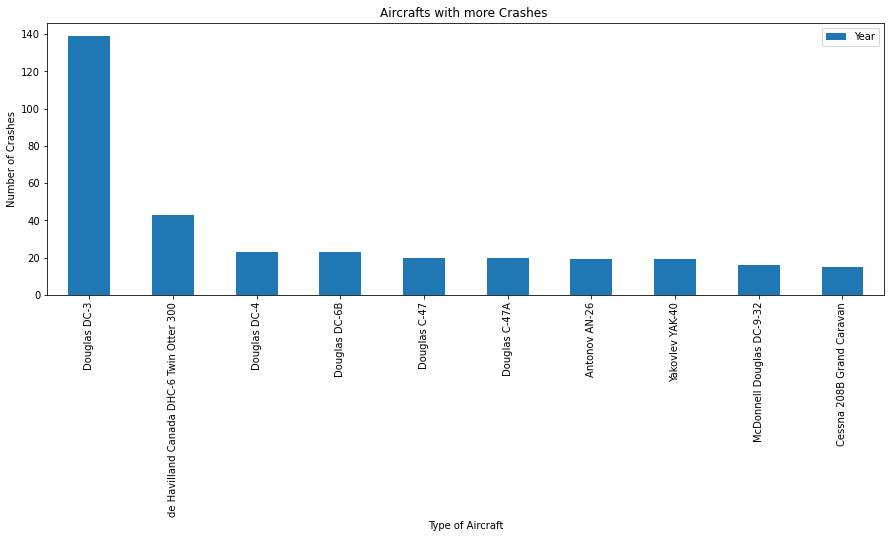

In [35]:
#Displaying Aircraft with more accidents
aircraft = df.loc[:, ["Type","Year"]].groupby(['Type']).count()
aircraft = aircraft.sort_values(by="Year", ascending=False).head(10)
aircraft_df = aircraft.plot.bar(figsize=(15,5), 
                               title="Aircrafts with more Crashes ")
aircraft_df.set_xlabel("Type of Aircraft")
aircraft_df.set_ylabel("Number of Crashes")

In [36]:
#Displaying Top 10 of operators with more accidents
operator = df.groupby('Operator')[['Total Death']].sum() 
operator = operator.rename(columns={"Operator": "Total Death"})
operator = operator.sort_values(by='Total Death', ascending=False)
operator_top10 = operator.head(10)
operator_top10

,Total Death
Operator,
American Airlines,4309.0
United Air Lines,3770.0
Military - U.S. Air Force,3006.0
Aeroflot,2802.0
Pan American World Airways,1311.0
Air France,1284.0
Military - U.S. Army Air Forces,1055.0
China Airlines (Taiwan),791.0
Trans World Airlines,787.0


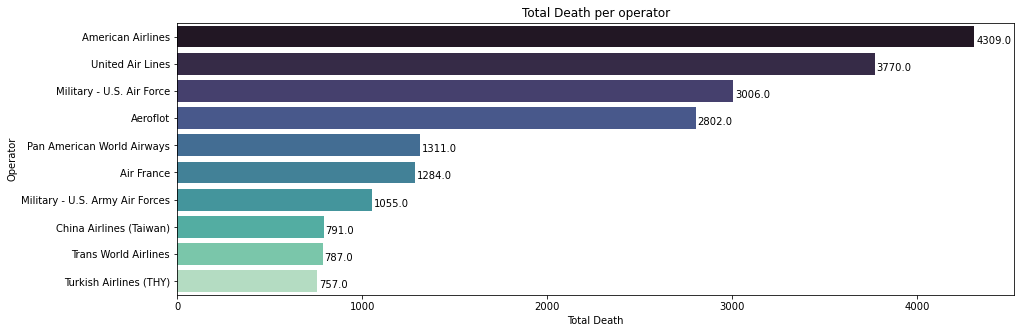

In [37]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(y=operator_top10.index, x="Total Death", data=operator_top10, palette='mako')
for i, v in enumerate(operator_top10["Total Death"]):
    ax.text(v + 10, i + .25, str(v), color='black', fontsize=10)
plt.xlabel('Total Death')
plt.ylabel('Operator')
plt.title('Total Death per operator')
plt.show()

In [38]:
FSG_per_year = df[['Year', 'Fatalities', 'Survivors', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

Text(0.5, 1.0, 'Fatalities vs Survived vs Killed on Ground per Year')

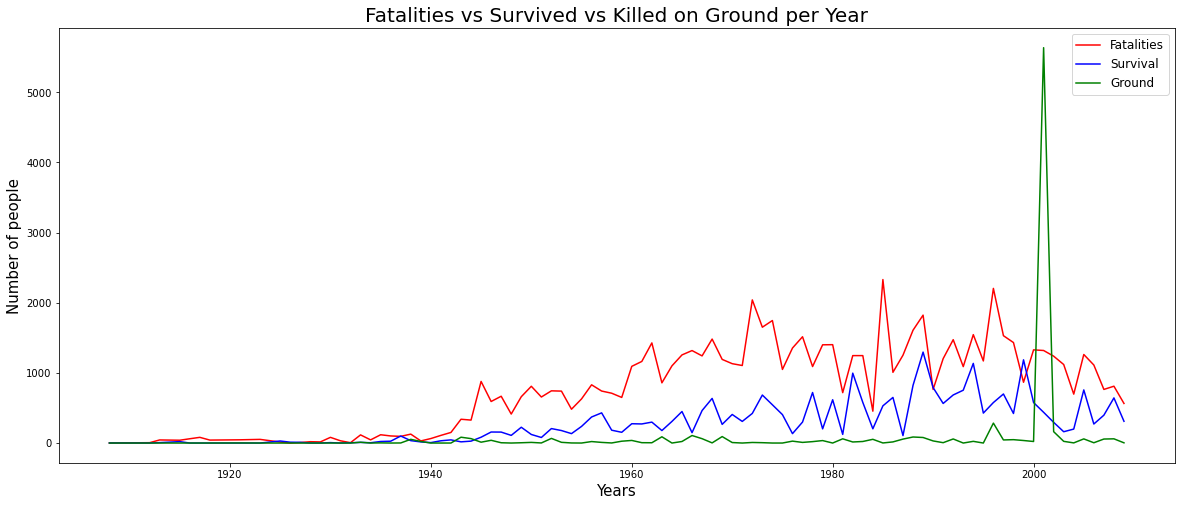

In [39]:
plt.figure(figsize=(20,8))
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year, color = 'red')
sns.lineplot(x = 'Year', y = 'Survivors', data = FSG_per_year, color = 'blue')
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year, color = 'green')
plt.legend(['Fatalities', 'Survival', 'Ground'], fontsize=12)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.title('Fatalities vs Survived vs Killed on Ground per Year', fontsize=20)

Text(0, 0.5, 'Number of Crashes')

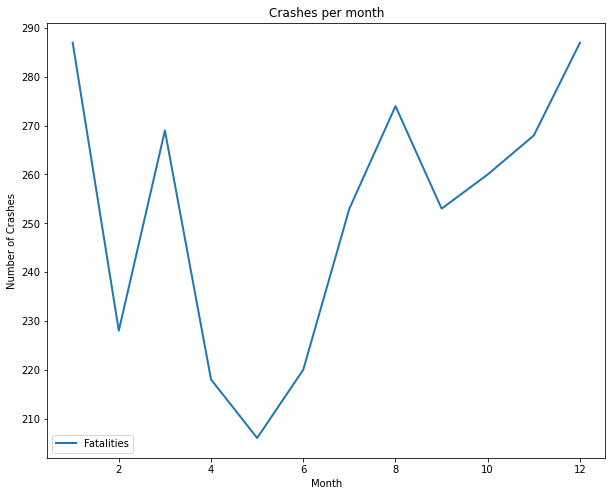

In [40]:
crash_month = df.loc[:, ["Month","Fatalities"]].groupby(['Month']).count()
crash_month_plt = crash_month.plot(lw=2, title='Crashes per month', figsize=(10,8))
crash_month_plt.set_xlabel("Month")
crash_month_plt.set_ylabel("Number of Crashes")


# **Correlation**

In [41]:
#Displaying Correlation between features
df.corr()

,Day,Month,Year,Aboard,Fatalities,Survivors,Ground,Total Death
Day,1.000000,0.039687,0.014276,0.015792,-0.006292,0.032417,-0.014887,-0.015814
Month,0.039687,1.000000,-0.032181,0.039346,0.032787,0.021124,0.017260,0.030805
Year,0.014276,-0.032181,1.000000,0.060369,0.020972,0.068510,0.031235,0.036981
Aboard,0.015792,0.039346,0.060369,1.000000,0.768571,0.616533,0.021719,0.394560
Fatalities,-0.006292,0.032787,0.020972,0.768571,1.000000,-0.029856,0.034453,0.518667
Survivors,0.032417,0.021124,0.068510,0.616533,-0.029856,1.000000,-0.008466,-0.021848
Ground,-0.014887,0.017260,0.031235,0.021719,0.034453,-0.008466,1.000000,0.872338
Total Death,-0.015814,0.030805,0.036981,0.394560,0.518667,-0.021848,0.872338,1.000000


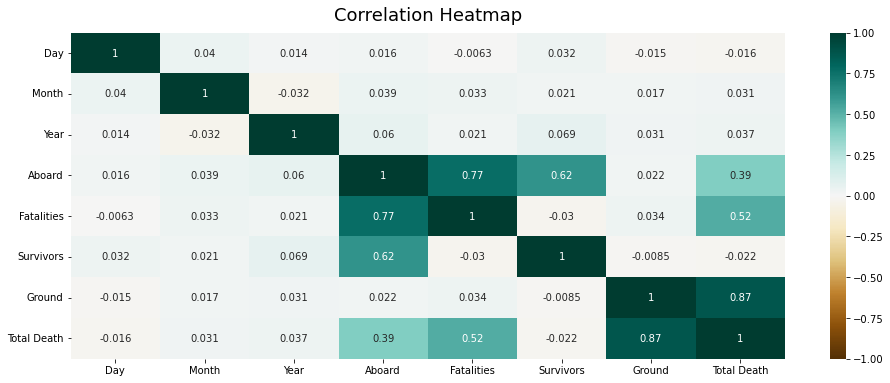

In [42]:
#Displaying Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

<AxesSubplot:xlabel='Aboard', ylabel='Fatalities'>

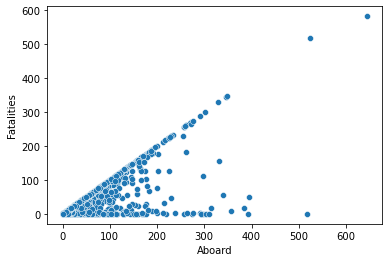

In [43]:
#Displayin Scatterplot between "Aboard" and "Fatalities" feature.
sns.scatterplot('Aboard','Fatalities',data=df)

<AxesSubplot:xlabel='Total Death', ylabel='Aboard'>

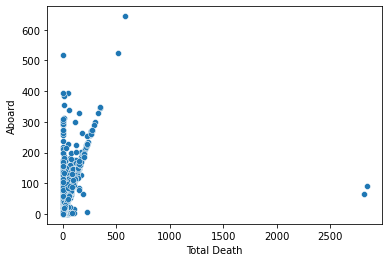

In [44]:
sns.scatterplot('Total Death','Aboard',data=df)

<AxesSubplot:xlabel='Total Death', ylabel='Ground'>

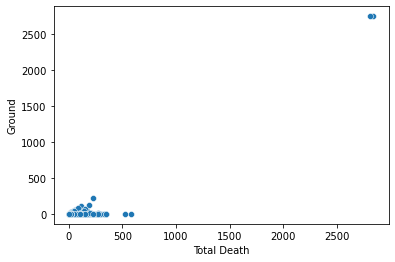

In [45]:
sns.scatterplot('Total Death','Ground',data=df)

<AxesSubplot:xlabel='Fatalities', ylabel='Total Death'>

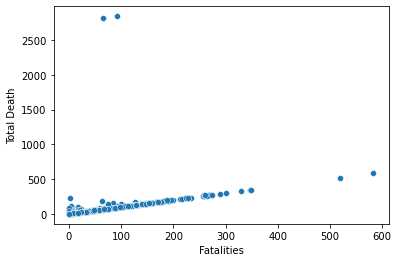

In [46]:
sns.scatterplot('Fatalities','Total Death',data=df)

# 2. Machine Learning

# 2.1 K-Means Clustering (Text)

In [47]:
#Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
#Preprocessing data to apply model
text_df= df['Summary'].dropna()
text_df = pd.DataFrame(text_df)
# for reproducibility
random_state = 0 

In [49]:

documents = list(df['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

In [50]:
#Applying algorithm with 5 clusters
model = MiniBatchKMeans(n_clusters=5, random_state=random_state)
model.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=0)

In [51]:
model.cluster_centers_

array([[9.25664092e-05, 1.10715749e-02, 3.53704624e-04, ...,
        3.14715251e-04, 7.18860049e-04, 0.00000000e+00],
       [5.80196261e-04, 1.15006054e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.69517129e-03, 0.00000000e+00, ...,
        0.00000000e+00, 3.14287227e-04, 7.30138628e-04],
       [0.00000000e+00, 3.05150935e-03, 0.00000000e+00, ...,
        0.00000000e+00, 3.23523482e-05, 0.00000000e+00],
       [0.00000000e+00, 1.00029400e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [52]:
# predict cluster labels for new dataset
model.predict(X)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
model.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [53]:
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

for i in range(5):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
aircraft
crashed
engine
failure
landing
flight
takeoff
plane
crew
pilot


Cluster 1:
plane
crashed
route
en
cargo
engine
taking
shortly
takeoff
airport


Cluster 2:
approach
runway
short
crashed
aircraft
plane
final
fog
landing
pilot


Cluster 3:
conditions
weather
pilot
flight
vfr
adverse
crashed
continued
terrain
poor


Cluster 4:
descent
approach
premature
altitude
aircraft
crashed
uncontrolled
mountain
instrument
minimum


In [54]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

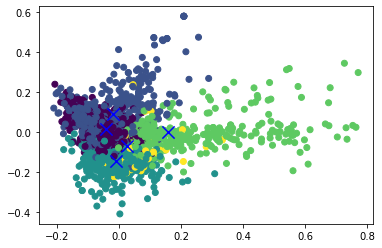

In [55]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [56]:
## Creating and displaying Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [57]:
# Preprocess the summary feature
df["Summary"] = df["Summary"].str.lower()
df["Summary"] = df["Summary"].str.replace('[^\w\s]','')

In [58]:
# Create a bag-of-words model
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["Summary"])

In [59]:
# Identify common causes
terms = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
freqs = dict(zip(terms, scores))
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1], reverse=True)

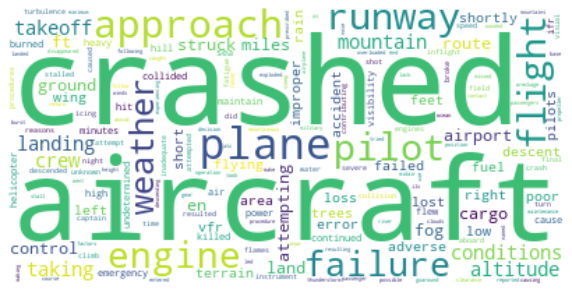

In [60]:
# Visualize the results
wordcloud = WordCloud(background_color="white").generate_from_frequencies(freqs)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [110]:
import re

In [111]:
df["Summary"] = df["Summary"].str.lower()
df["Summary"] = df["Summary"].str.replace('[^\w\s]','')

In [112]:
# Define a function to extract the reason from the summary
def extract_reason(summary):
    reasons = {
        "Pilot/Co-pilot/Crew Error": ["pilot error", "human error", "crew error", "error", "co-pilot error", "crews error", "pilot", "co-pilot", "crew", "crews", "disorientation", "non-compliance", "captain"],
        "Mechanical Failure": ["mechanical failure", "engine failure", "structural failure", "mechanical problem", "malfunctioning", "engine failed", "engine", "engine trouble"],
        "Weather Conditions": ["weather", "icing", "fog", "thunderstorm", "wind", "turbulence", "rain", "lightning", "winds"],
        "Landing/Take Off": ["landing", "take off", "landings", "land"],
        "Terrorism": ["terrorism", "hijack", "hijacker", "terrorist"],
        "War": ["war", "shot", "shot down"],
        "Fuel Problem": ["fuel", "fuel starvation"],
        "Design Problem": ["stabilizier", "vertical stabilizier", "rudder", "elevator", "aileron", "flaps", "spoiler", "slats", "fuselage", "cockpit", "wing", "wings", "horizontal estabilizier"],
        "Fire/Electrical Failure": ["fire", "smoke", "burned", "burn", "burning", "electrical failure", "electric", "explosion"],
        "Unknow": ["unknow"],
        "Other": []
    }
    for reason, keywords in reasons.items():
        for keyword in keywords:
            if re.search(keyword, summary):
                return reason
    return "other"

In [113]:
# Apply the function to the summary column to create a new reason column
df["Cause of Crash"] = df["Summary"].apply(extract_reason)

In [114]:
df.head()

,Day,Month,Year,Location,Operator,Route,Type,Aboard,Fatalities,Survivors,Ground,Total Death,Summary,Reason,Cause of Crash
0,17,9,1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,0.0,1.0,during a demonstration flight a us army flyer ...,Design Problem,Design Problem
1,12,7,1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,0.0,5.0,first us dirigible akron exploded just offshor...,other,other
3,9,9,1913,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,14.0,6.0,0.0,14.0,the airship flew into a thunderstorm and encou...,Weather Conditions,Weather Conditions
4,17,10,1913,"Near Johannisthal, Germany",Military - German Navy,Unknown,Zeppelin L-2 (airship),30.0,30.0,0.0,0.0,30.0,hydrogen gas which was being vented was sucked...,Mechanical Failure,Mechanical Failure
5,5,3,1915,"Tienen, Belgium",Military - German Navy,Unknown,Zeppelin L-8 (airship),41.0,21.0,20.0,0.0,21.0,crashed into trees while attempting to land af...,Landing/Take Off,Landing/Take Off


In [115]:
df['Cause of Crash'].value_counts()

Pilot/Co-pilot/Crew Error    1438
Weather Conditions            457
other                         401
Mechanical Failure            306
Landing/Take Off              185
Design Problem                 71
War                            63
Fire/Electrical Failure        62
Unknow                         25
Fuel Problem                   10
Terrorism                       5
Name: Cause of Crash, dtype: int64

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [120]:
X = df["Summary"]
y = df["Cause of Crash"]

In [121]:
# Convert the text data into a numerical feature matrix
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(X)

In [122]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "alpha": [0.1, 0.01, 0.001, 0.0001, 0.00001],
}

In [123]:
# Create the Naive Bayes classifier
nb = MultinomialNB()

In [124]:
# Perform cross-validation with hyperparameter tuning
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05]})

In [125]:
# Print the best hyperparameters and cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.01}
Cross-validation score: 0.6156149088719829
